## On souhaite simuler un opérateur logique 'Non-xor' 

### Generer des cas d'ecole  1 ou 0

In [1]:
import numpy as np 
import random
import pandas as pd

In [2]:
# Le XOR
print(bool(1) != bool(0))
print(bool(1) != bool(1))
print(bool(0) != bool(0))
print(bool(0) != bool(1))
print('---------')
# Le non XOR
print(not(bool(1) != bool(0)))
print(not(bool(1) != bool(1)))
print(not(bool(0) != bool(0)))
print(not(bool(0) != bool(1)))



True
False
False
True
---------
False
True
True
False


### Construction des données d apprentissage


#### Cas simples: 0 ou 1

In [3]:
x1 = [random.choice([0.0, 1.0])   for x in range(30)]
x2 =  [random.choice([0.0, 1.0])   for x in range(30)]

In [4]:
print(x1)

[1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0]


### détermination des etiquettes 0 ou 1

In [5]:
y_cas_general = zip(x1, x2)
y_general = [0 if bool(x[0]) != bool(x[1])  else 1  for x in y_cas_general  ]

### introduction de 'bruit' dans les données

In [6]:
ecart = list(range(6))
print(ecart)

[0, 1, 2, 3, 4, 5]


### Création d'un deuxieme jeu de données: les entrants sont pertubés mais le resultats doit rester le même

In [7]:
# x3 = [0 + (random.choice(ecart) / 10.0) for x ]
y_cas_general = zip(x1, x2)
x_fading = []
for (nx0,nx1) in y_cas_general :
    if nx0 == 0:
        nx0 += (random.choice(ecart) / 10.0)
    else:
        nx0 -= (random.choice(ecart) / 10.0) 
    if nx1 == 0:
        nx1 += (random.choice(ecart) / 10.0)
    else:
        nx1 -= (random.choice(ecart) / 10.0) 
    x_fading.append((nx0, nx1))
y_fading = y_general


### Création d'un datagramme qu'il faudra 'retourner' c'est à dire le transposer

In [8]:
dt = pd.DataFrame([x1, x2, y_general])
print(dt.shape)
print(dt.head())

(3, 30)
    0    1    2    3    4    5    6    7    8    9   ...   20   21   22   23  \
0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  ...  0.0  1.0  1.0  0.0   
1  1.0  1.0  0.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  1.0  0.0  0.0   
2  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  ...  0.0  1.0  0.0  1.0   

    24   25   26   27   28   29  
0  1.0  1.0  1.0  0.0  0.0  1.0  
1  1.0  0.0  0.0  0.0  0.0  0.0  
2  1.0  0.0  0.0  1.0  1.0  0.0  

[3 rows x 30 columns]


### Fabrication d'un 2eme dataframe pour les données brouillées

In [9]:
x0_fadingok = [x0 for x0,_ in x_fading]
x1_fadingok = [x1 for _,x1 in x_fading]

              
dt2 = pd.DataFrame([x0_fadingok, x1_fadingok, y_general])
print(dt2.head())

    0    1    2    3    4    5    6    7    8    9   ...   20   21   22   23  \
0  1.0  0.1  0.0  0.4  0.8  0.8  1.0  0.7  0.0  0.0  ...  0.5  0.6  0.7  0.2   
1  0.8  0.5  0.4  0.5  0.7  0.4  1.0  0.5  0.5  0.0  ...  0.8  1.0  0.0  0.0   
2  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  ...  0.0  1.0  0.0  1.0   

    24   25   26   27   28   29  
0  0.6  0.8  0.8  0.5  0.2  0.5  
1  0.6  0.4  0.2  0.3  0.4  0.5  
2  1.0  0.0  0.0  1.0  1.0  0.0  

[3 rows x 30 columns]


### On concatene les deux dataframes

In [10]:
dtotal = pd.concat([dt,dt2], axis = 1)

In [11]:
dtotal.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.5,0.6,0.7,0.2,0.6,0.8,0.8,0.5,0.2,0.5
1,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.8,1.0,0.0,0.0,0.6,0.4,0.2,0.3,0.4,0.5
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0


In [12]:
import matplotlib.pyplot as plt

### On permutte les colonnes et les iignes: transposition

In [13]:
dtotal= dtotal.transpose()
print(dtotal.head())

     0    1    2
0  1.0  1.0  1.0
1  0.0  1.0  0.0
2  0.0  0.0  1.0
3  0.0  1.0  0.0
4  1.0  1.0  1.0


### Création d'un filtre nommé

In [14]:
vrai = dtotal[2] == 1

### Decompte des 'faux' et 'vrais'

In [15]:
vrai.value_counts()

True     34
False    26
Name: 2, dtype: int64

### Visualisation des données

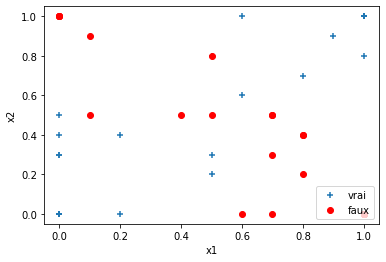

In [16]:
plt.scatter(dtotal[0][vrai],dtotal[1][vrai], marker='+' )
plt.scatter(dtotal[0][~vrai],dtotal[1][~vrai], marker='o' , color ='r' )
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(['vrai', 'faux'], loc = 'lower right')


### Utisation d'un perceptron

In [17]:
from sklearn.neural_network import MLPClassifier

### Export du dataframe vers des objets numpy

In [18]:
X_ = dtotal[[0,1]].to_numpy()
y = dtotal[2].to_numpy()
print(len(y))

60


### Entrainement du modèle

In [57]:
clf = MLPClassifier(max_iter=3000, random_state=0, hidden_layer_sizes=(10, ) , activation = 'relu')
clf.fit(X_, y )

MLPClassifier(hidden_layer_sizes=(10,), max_iter=3000, random_state=0)

### Affiche les poids calculés

In [60]:
print(clf.coefs_)

[array([[ 3.00331805e-01,  1.43136628e-01,  1.68661817e+00,
        -2.97703190e-01,  2.57323728e-39,  1.43270037e+00,
         4.07202025e-42,  1.35766912e-01,  4.00471852e-01,
         1.51839913e+00],
       [ 1.60489186e+00, -7.70188572e-01, -1.68656527e+00,
        -6.81371736e-01, -1.88594625e-04, -1.43285495e+00,
        -7.63937471e-04,  1.99103901e+00,  6.66577370e-02,
         1.51822024e+00]]), array([[-1.34058926e+00],
       [ 7.50247390e-01],
       [-2.10539024e+00],
       [ 7.43769434e-01],
       [-1.28205831e-03],
       [-1.80913947e+00],
       [ 8.75011540e-31],
       [-5.54471384e-01],
       [ 3.43813188e-01],
       [ 2.85495761e+00]])]


### Construction des cas de test

In [26]:
tests  = np.array([[0,0], [1,0], [0,1] , [1, 1]])
y_theorique = np.array([1, 0, 0, 1])

### Score de notre modèle

In [58]:
clf.score(tests, y_theorique)

1.0

### Prévisions

In [59]:
clf.predict(tests)

array([1., 0., 0., 1.])

In [63]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 3000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### Choisir la bonne configuration: 

In [66]:
from sklearn.model_selection import GridSearchCV

### tester les differentes fonctions d activation de manière systématique

In [69]:
param_atester = { 'activation' : ('logistic', 'relu', 'identity', 'tanh')}

In [67]:
clf = MLPClassifier(max_iter=3000, random_state=0, hidden_layer_sizes=(10, ))

In [70]:
gs  =GridSearchCV(clf, param_atester, cv = 4)
gs.fit(X_,y)

GridSearchCV(cv=4,
             estimator=MLPClassifier(hidden_layer_sizes=(10,), max_iter=3000,
                                     random_state=0),
             param_grid={'activation': ('logistic', 'relu', 'identity',
                                        'tanh')})

In [71]:
gs.best_params_

{'activation': 'relu'}

In [76]:
param_atester = { 'hidden_layer_sizes': [(5,), (7,) , (10,)]}
clf = MLPClassifier(max_iter=3000, random_state=0, activation = 'relu')

In [77]:
gs  =GridSearchCV(clf, param_atester, cv = 4)
gs.fit(X_,y)

GridSearchCV(cv=4, estimator=MLPClassifier(max_iter=3000, random_state=0),
             param_grid={'hidden_layer_sizes': [(5,), (7,), (10,)]})

In [78]:
gs.best_params_

{'hidden_layer_sizes': (7,)}

In [80]:
###  On peut combiner plusieurs parametres dans la recherche.
param_atester = { 'hidden_layer_sizes': [(5,), (7,) , (10,)], 'max_iter':(1000, 2000, 3000)}
clf = MLPClassifier( random_state=0, activation = 'relu')

In [81]:
gs  =GridSearchCV(clf, param_atester, cv = 4)
gs.fit(X_,y)

C:\Users\33681\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\33681\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\33681\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\33681\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\33681\anaconda3\lib\site-packages\sklearn\neural_network\_m

GridSearchCV(cv=4, estimator=MLPClassifier(random_state=0),
             param_grid={'hidden_layer_sizes': [(5,), (7,), (10,)],
                         'max_iter': (1000, 2000, 3000)})

In [82]:
gs.best_params_

{'hidden_layer_sizes': (7,), 'max_iter': 2000}

### Remarques : dans le cas d'un apprentissage avec ds données en nombre important et un modèle complexe
### L'utilisation de : RandomizedSearchCV permet généralement de gagner du temps

In [83]:
from sklearn.model_selection import RandomizedSearchCV

In [84]:
rds  =RandomizedSearchCV(clf, param_atester, cv = 4)
rds.fit(X_,y)

C:\Users\33681\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\33681\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\33681\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\33681\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\33681\anaconda3\lib\site-packages\sklearn\neural_networ

RandomizedSearchCV(cv=4, estimator=MLPClassifier(random_state=0),
                   param_distributions={'hidden_layer_sizes': [(5,), (7,),
                                                               (10,)],
                                        'max_iter': (1000, 2000, 3000)})

In [85]:
rds.best_params_

{'max_iter': 2000, 'hidden_layer_sizes': (7,)}